In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [7]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [4]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [5]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

In [6]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

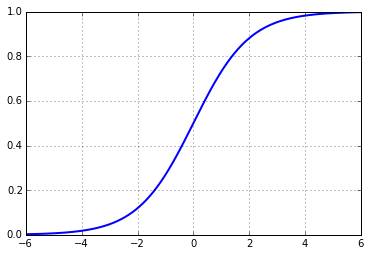

In [7]:
testInput = np.arange(-6, 6, 0.01)
plt.plot(testInput, sigmoid(testInput), linewidth = 2)
plt.grid()

In [57]:
class Neural_Network(object):
    def __init__(self, Lambda = 0):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    
    def sigmoidPrime(self, z):
        #Derivative of sigmoid function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1 
        
        return dJdW1, dJdW2
    
    #helper functions
    def getParams(self):
        #roll W1 and W2 into a vector
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize * self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [8]:
NN = Neural_Network()
yHat = NN.forward(X)
yHat

array([[ 0.48668569],
       [ 0.48823752],
       [ 0.50820528]])

In [12]:
def sigmoidPrime(z):
    return np.exp(-z) / ((1 + np.exp(-z))**2)

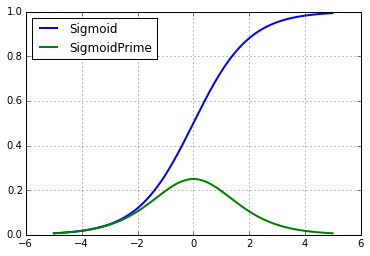

In [17]:
xs = np.arange(-5, 5, 0.01)
plt.plot(xs, sigmoid(xs), linewidth = 2)
plt.plot(xs, sigmoidPrime(xs), linewidth = 2)
plt.grid()
plt.legend(["Sigmoid", "SigmoidPrime"], loc = "upper left")

In [25]:
cost1 = NN.costFunction(X, y)
dJdW1, DJdW2 = NN.costFunctionPrime(X, y)
dJdW1

array([[-0.03351329,  0.00665255, -0.00975955],
       [-0.01716211,  0.00299535, -0.00476423]])

In [2]:
def f(x): return x**2

In [3]:
epsilon = 1e-4
x = 1.5
numericalGrad = (f(x + epsilon) - f(x - epsilon)) / (2*epsilon)
print numericalGrad, 2*x

3.0 3.0


In [9]:
def computeNumGrad(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4
    
    for p in range(len(paramsInitial)):
        perturb[p] = e
        N.setParams(paramsInitial + perturb) #equivalent of f(x+epsilon)
        loss2 = N.costFunction(X, y)   #calculate loss after adding perturbation term
        
        N.setParams(paramsInitial - perturb) #equivalent of f(x-epsilon)
        loss1 = N.costFunction(X, y)
        
        numgrad[p] = (loss2 - loss1) / (2 * e)  #numerical gradient 
        perturb[p] = 0
    
    N.setParams(paramsInitial) #reset parameters to original value
    return numgrad

In [11]:
numgrad = computeNumGrad(NN, X, y)
print numgrad

[ 0.01406165  0.00454572 -0.01035666  0.01021928  0.00297098 -0.00827799
 -0.13529894 -0.02806152 -0.17039072]


In [12]:
grad = NN.computeGradients(X, y)
print grad

[ 0.01406165  0.00454572 -0.01035666  0.01021928  0.00297098 -0.00827799
 -0.13529894 -0.02806152 -0.17039072]


In [15]:
def norm(x):
    return np.sqrt(sum(x**2))

norm(grad - numgrad) / norm(grad + numgrad)

1.7330434677019736e-10

In [16]:
from scipy import optimize

In [50]:
class trainer(object):
    def __init__(self, N):
        #local reference to neural network
        self.N = N
    
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X, y)
        return cost, grad
    
    def train(self, trainX, trainY, testX, testY):
        #internal variable for call back function
        self.X = trainX
        self.y = trainY
        self.testX = testX
        self.testY = testY
        
        self.J = [] #empty list to store costs
        self.testJ = []
        
        params0 = self.N.getParams()
        options = {"maxiter":200, "disp": True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method="BFGS", 
                                 args=(trainX, trainY), options = options, callback = self.callbackF)
        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [20]:
T = trainer(NN)
T.train(X, y)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


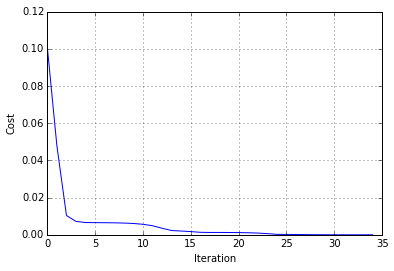

In [21]:
plt.plot(T.J)
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [22]:
NN.forward(X)

array([[ 0.75002016],
       [ 0.82006683],
       [ 0.92990496]])

In [25]:
X = np.array(([3, 5], [5, 1], [10, 2], [6, 1.5]), dtype=float) #X: [sleep, study] pairs in hours
y = np.array(([75], [82], [93], [70]), dtype=float)

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


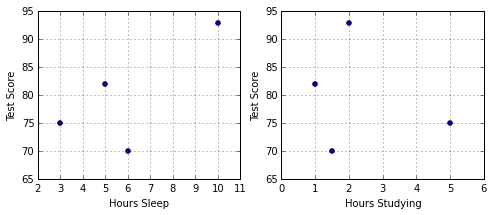

In [26]:
fig = plt.figure(0, (8, 3))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y)
plt.grid()
plt.xlabel("Hours Sleep")
plt.ylabel("Test Score")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y)
plt.grid()
plt.xlabel("Hours Studying")
plt.ylabel("Test Score")

In [27]:
#Normalize X and y data
X = X / np.amax(X, axis=0)
y = y/max(y)
T = trainer(NN)
T.train(X, y)

Optimization terminated successfully.
         Current function value: 0.000001
         Iterations: 104
         Function evaluations: 130
         Gradient evaluations: 130


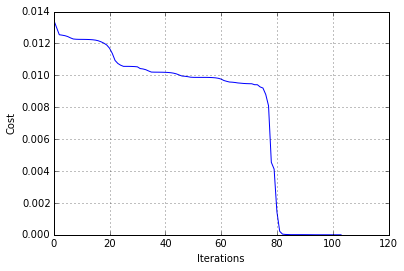

In [28]:
plt.plot(T.J)
plt.grid()
plt.xlabel("Iterations")
plt.ylabel("Cost")

In [31]:
hoursSleep = np.linspace(0, 10, 100)
hoursStudy = np.linspace(0, 5, 100)
hoursSleepNorm = hoursSleep / 100.0
hoursStudyNorm = hoursStudy / 5.0

a, b = np.meshgrid(hoursSleepNorm, hoursStudyNorm)
allInputs = np.zeros((a.size, 2))
allInputs[:, 0] = a.ravel()
allInputs[:, 1] = b.ravel()
allOutputs = NN.forward(allInputs)

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


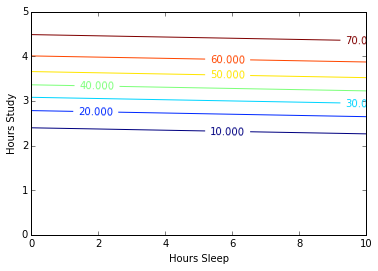

In [33]:
yy = np.dot(hoursStudy.reshape(100, 1), np.ones((1, 100)))
xx = np.dot(hoursSleep.reshape(100, 1), np.ones((1, 100))).T

CS = plt.contour(xx, yy, 100*allOutputs.reshape(100, 100))
plt.clabel(CS, inline = 1, fontsize = 10)
plt.xlabel("Hours Sleep")
plt.ylabel("Hours Study")

In [34]:
from mpl_toolkits.mplot3d import Axes3D

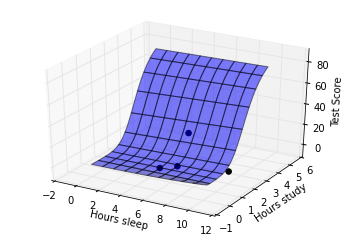

In [38]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.scatter(10*X[:, 0], 5*X[:, 1], c="k", alpha = 1, s = 30)
surf = ax.plot_surface(xx, yy, 100*allOutputs.reshape(100, 100), alpha = 0.5)
ax.set_xlabel("Hours sleep")
ax.set_ylabel("Hours study")
ax.set_zlabel("Test Score")

In [44]:
trainX = np.array(([3, 5], [5, 1], [10, 2], [6, 1.5]), dtype=float) #X: [sleep, study] pairs in hours
trainY = np.array(([75], [82], [93], [70]), dtype=float)

testX = np.array(([4, 5.5], [4.5, 1], [9, 2.5], [6, 2]), dtype=float) #X: [sleep, study] pairs in hours
testY = np.array(([70], [89], [85], [75]), dtype=float)

#normalize data
trainX = trainX / np.amax(trainX, axis = 0)
trainY = trainY / 100
testX = testX / np.amax(testX, axis = 0)
testY = testY / 100

In [55]:
NN = Neural_Network()
T = trainer(NN)
T.train(trainX, trainY, testX, testY)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 197
         Function evaluations: 229
         Gradient evaluations: 229


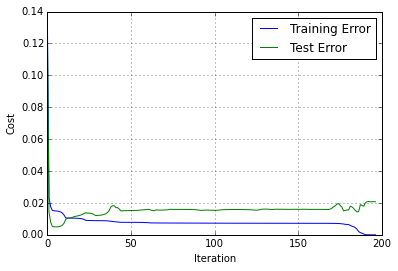

In [56]:
plt.plot(T.J, label = "Training Error")
plt.plot(T.testJ, label = "Test Error")
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()

In [58]:
NN = Neural_Network(Lambda=0.0001)
numgrad = computeNumGrad(NN, X, y)
grad = NN.computeGradients(X, y)

In [59]:
print numgrad, grad

[-0.00349947  0.00440673 -0.0026633  -0.00244309  0.00289061 -0.00191868
 -0.03231496 -0.03216123 -0.04205343] [-0.00349947  0.00440673 -0.0026633  -0.00244309  0.00289061 -0.00191868
 -0.03231496 -0.03216123 -0.04205343]


In [60]:
print norm(grad - numgrad)/norm(grad + numgrad)

7.4800138579e-11


In [61]:
T = trainer(NN)
T.train(X, y, testX, testY)

Optimization terminated successfully.
         Current function value: 0.003307
         Iterations: 122
         Function evaluations: 128
         Gradient evaluations: 128


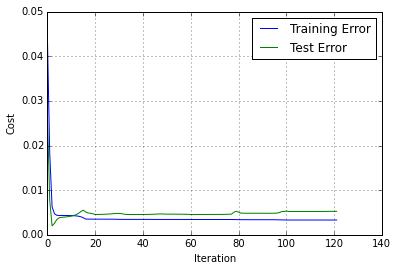

In [62]:
plt.plot(T.J, label="Training Error")
plt.plot(T.testJ, label = "Test Error")
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()